In [2]:
import numpy as np
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
path = '/kaggle/input/ecg-full-data/045_0-500000_corrected.csv'
data = pd.read_csv(path)

In [4]:
#Sample raw data
data.head(5)

,Time,Raw,Label
0,0.000000,-161.521893,0.0
1,0.000208,-178.571427,0.0
2,0.000416,-190.236900,0.0
3,0.000624,-188.442211,0.0
4,0.000832,-189.339555,0.0


In [5]:
data['Label'].value_counts()

Label
0.0    499356
1.0       644
Name: count, dtype: int64

In [6]:
time = data['Time']
voltage = data['Raw']
labels = data['Label']

In [7]:
# Reshape the ECG data to a 2D array (assuming it's a single-channel signal)
raw_ecg_data = np.array(voltage).reshape(-1, 1)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data and transform the data to normalized values
normalized_ecg_data = scaler.fit_transform(raw_ecg_data)

# Convert the normalized data back to a 1D array
voltage_scaled = normalized_ecg_data.flatten()

In [8]:
# Define parameters for segmentation
window_size = 100  # Size of each window
stride = 100   # Stride between windows

# Lists to store segmented windows and corresponding labels
segmented_windows = []
segment_labels = []

# Segment the raw ECG data and extract features
for i in range(0, len(voltage_scaled) - window_size + 1, stride):
    window = voltage_scaled[i : i + window_size]
    label = max(labels[i : i + window_size])  # Use the maximum label in the window
    
    # Extract features from the window (you can replace this with actual feature extraction methods)
    mean = np.mean(window)
    std = np.std(window)
    #peak_count = len(find_peaks(window, height=0)[0])  # Count peaks using scipy's find_peaks
    
    # Append the features to the segmented windows list
    segmented_windows.append([mean, std])
    
    # Append the label to the segment labels list
    segment_labels.append(label)

# Convert lists to NumPy arrays for further processing
segmented_windows = np.array(segmented_windows)
segment_labels = np.array(segment_labels)

# # Standardize the features
# scaler = StandardScaler()
# segmented_windows_standardized = scaler.fit_transform(segmented_windows)

# Print a few examples to verify
for i in range(5):
    print("Window:", segmented_windows[i])
    print("Label:", segment_labels[i])
    print()

Window: [-1.07540416  0.32730379]
Label: 0.0

Window: [-0.42917738  0.19678468]
Label: 0.0

Window: [-0.81426384  0.48299153]
Label: 0.0

Window: [1.38320002 1.00448116]
Label: 1.0

Window: [0.43312489 0.43035817]
Label: 0.0



In [9]:
# Define proper column names for your features
column_names = ["Mean Voltage", "STD Voltage"]

# Create a DataFrame from segmented windows and labels
window_data = pd.DataFrame(data=segmented_windows, columns=column_names)

# Add a column for the labels
window_data["Label"] = segment_labels

# Print the first few rows of the DataFrame to verify
window_data.head(5)

,Mean Voltage,STD Voltage,Label
0,-1.075404,0.327304,0.0
1,-0.429177,0.196785,0.0
2,-0.814264,0.482992,0.0
3,1.383200,1.004481,1.0
4,0.433125,0.430358,0.0


In [10]:
type(segment_labels)

numpy.ndarray

In [11]:
len(segment_labels)

5000

In [12]:
len(segment_labels[segment_labels==1])

644

In [91]:
# list(segment_labels)

In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(segmented_windows, segment_labels, test_size=0.2, random_state=42)

In [14]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0)  
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# # Make predictions on the test set
# y_pred = svm_classifier.predict(X_test)
# from sklearn.metrics import classification_report
# # Print classification report
# print(classification_report(y_test, y_pred))

In [50]:

# from sklearn.metrics import roc_auc_score,matthews_corrcoef, roc_curve, auc
# roc_auc = roc_auc_score(y_test, y_pred)
# mcc_score = matthews_corrcoef(y_test, y_pred)
# print("ROC-AUC score", roc_auc)
# print("Matthews Correlation Coefficient:", mcc_score)

In [51]:
# from sklearn.metrics import confusion_matrix,roc_curve,auc
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Create a heatmap visualization
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=["Predicted Negative", "Predicted Positive"],
#             yticklabels=["Actual Negative", "Actual Positive"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

In [52]:
# from sklearn.metrics import matthews_corrcoef
# mcc_score = matthews_corrcoef(y_test, y_pred)
# print("Matthews Correlation Coefficient:", mcc_score)

In [53]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_curve = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_curve)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc='lower right')
# plt.show()

# Testing the Model

In [23]:
test_path= '/kaggle/input/rodent-ecg/data.csv'
test_data = pd.read_csv(test_path)
voltage = test_data['Raw']
labels = test_data['Label']
time_t = test_data['Time']

In [24]:
# Reshape the ECG data to a 2D array (assuming it's a single-channel signal)
raw_ecg_data = np.array(voltage).reshape(-1, 1)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data and transform the data to normalized values
normalized_ecg_data = scaler.fit_transform(raw_ecg_data)

# Convert the normalized data back to a 1D array
voltage_scaled = normalized_ecg_data.flatten()

In [25]:
# Define parameters for segmentation
window_size = 100  # Size of each window
stride = 100   # Stride between windows

# Lists to store segmented windows and corresponding labels
segmented_windows = []
segment_labels = []

# Segment the raw ECG data and extract features
for i in range(0, len(voltage_scaled) - window_size + 1, stride):
    window = voltage_scaled[i : i + window_size]
    label = max(labels[i : i + window_size])  # Use the maximum label in the window
    time_tt = time_t[i : i + window_size]
    # Extract features from the window (you can replace this with actual feature extraction methods)
    mean = np.mean(window)
    std = np.std(window)
    mean_time = np.mean(time_tt)
    #peak_count = len(find_peaks(window, height=0)[0])  # Count peaks using scipy's find_peaks
    
    # Append the features to the segmented windows list
    segmented_windows.append([mean_time,mean, std])
    
    # Append the label to the segment labels list
    segment_labels.append(label)

# Convert lists to NumPy arrays for further processing
segmented_windows = np.array(segmented_windows)
segment_labels = np.array(segment_labels)

# # Standardize the features
# scaler = StandardScaler()
# segmented_windows_standardized = scaler.fit_transform(segmented_windows)

# Print a few examples to verify
for i in range(5):
    print("Window:", segmented_windows[i])
    print("Label:", segment_labels[i])
    print()

Window: [41.61030068  0.58170343  0.25255518]
Label: 0.0

Window: [41.63110068  0.05435529  1.82174011]
Label: 1.0

Window: [41.65190069 -0.32017575  0.29119488]
Label: 0.0

Window: [41.67270069  0.19629561  0.17703645]
Label: 0.0

Window: [41.69350069  0.37976542  0.27063577]
Label: 0.0



In [26]:
# Define proper column names for your features
column_names = ["Time","Mean Voltage", "STD Voltage"]

# Create a DataFrame from segmented windows and labels
window_data = pd.DataFrame(data=segmented_windows, columns=column_names)

# Add a column for the labels
window_data["Label"] = segment_labels

# Print the first few rows of the DataFrame to verify
window_data.head(5)

,Time,Mean Voltage,STD Voltage,Label
0,41.610301,0.581703,0.252555,0.0
1,41.631101,0.054355,1.821740,1.0
2,41.651901,-0.320176,0.291195,0.0
3,41.672701,0.196296,0.177036,0.0
4,41.693501,0.379765,0.270636,0.0


In [46]:
X_test = window_data[['Mean Voltage', 'STD Voltage']].values
y_test = window_data['Label'].values

# Evaluation of Prediction

In [47]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       859
         1.0       0.84      0.82      0.83       141

    accuracy                           0.95      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [48]:

from sklearn.metrics import roc_auc_score,matthews_corrcoef, roc_curve, auc
roc_auc = roc_auc_score(y_test, y_pred)
mcc_score = matthews_corrcoef(y_test, y_pred)
print("ROC-AUC score", roc_auc)
print("Matthews Correlation Coefficient:", mcc_score)

ROC-AUC score 0.8985419298375977
Matthews Correlation Coefficient: 0.8042979786210396


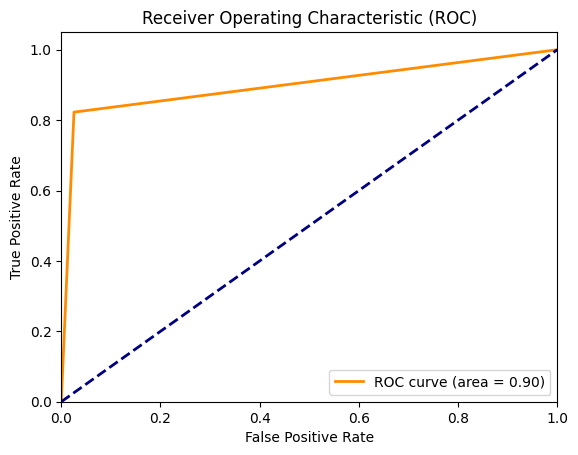

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_curve = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

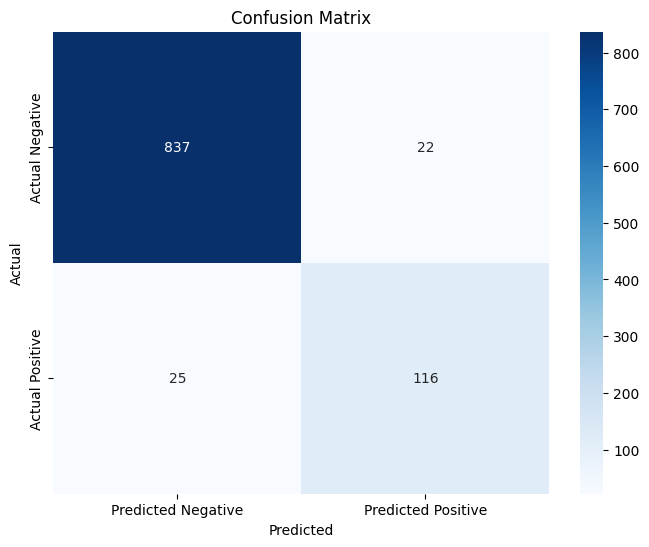

In [41]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Actual Heart Rate

In [43]:
r_peak_times = test_data[test_data['Label'] == 1]['Time']
time_intervals = r_peaka_times.diff().dropna()
average_time_interval = time_intervals.mean() 
heart_rate_bpm = 60.0 / average_time_interval
print("Heart rate (BPM):", heart_rate_bpm)

Heart rate (BPM): 404.971930373105


# Predicted Heart Rate

In [45]:
r_peak_times_pred = window_data[window_data['Label'] == 1]['Time']
time_intervals_pred = r_peak_times_pred.diff().dropna()
average_time_interval_pred = time_intervals_pred.mean() 
heart_rate_bpm_pred = 60.0 / average_time_interval_pred
print("Predicted Heart rate (BPM):", heart_rate_bpm_pred)

Predicted Heart rate (BPM): 405.0612922835089


1000

644

604